In [27]:
import pandas as pd
import geopandas as gpd
import requests
import json
import os

### get review data

In [28]:
key_google = os.environ.get('key_google')
key_outscraper = os.environ.get('key_outscraper')

#### get lat lon

In [ ]:
#### calculate centroids

In [9]:
areas = gpd.read_file('../data/raw/geodata/green_areas.geojson')

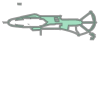

In [11]:
areas.iloc[0]['geometry']

##### get place IDs and review text

In [39]:
url_places = 'https://places.googleapis.com/v1/places:searchNearby'
url_scrapejobs = f'https://api.app.outscraper.com/maps/reviews-v3?limit=3&async=false&query={id}&reviewsLimit=10'
url_scrapejobs = "https://api.app.outscraper.com/maps/reviews-v3?limit=3&async=false&query=ChIJe8FmEzBQqEcRth79TMVowwU&reviewsLimit=10"

In [ ]:
52.494130, 13.377064



In [66]:
payload = json.dumps({
  "includedTypes": [
    "playground",
    "park"
  ],
  "maxResultCount": 1,
  "locationRestriction": {
    "circle": {
      "center": {
        "latitude": 52.494130,
        "longitude": 13.377064
      },
      "radius": 100
    }
  }
})

headers = {
  'X-Goog-FieldMask': 'places.id,places.displayName,places.formattedAddress,places.types,places.websiteUri',
  'Content-Type': 'application/json',
  'X-Goog-Api-Key': key_google
}

In [67]:
response = requests.request("POST", url_places, headers=headers, data=payload)

In [68]:
#ip adress need to be changed
response.json()

{'places': [{'id': 'ChIJe8FmEzBQqEcRth79TMVowwU',
   'types': ['state_park',
    'tourist_attraction',
    'park',
    'point_of_interest',
    'establishment'],
   'formattedAddress': 'Möckernstraße 26, 10963 Berlin, Germany',
   'websiteUri': 'https://www.parkamgleisdreieck.de/',
   'displayName': {'text': 'Park am Gleisdreieck', 'languageCode': 'en'}}]}

In [69]:
place_ids = [i['id'] for i in response.json()['places']]
id = place_ids[0]

In [70]:
headers = {
  'X-API-KEY': key_outscraper
}

In [75]:
id = "ChIJe8FmEzBQqEcRth79TMVowwU"

In [76]:
response = requests.request("GET", url_scrapejobs, headers=headers)

In [77]:
response.json()

{'id': 'a-554258ec-1d25-4f81-aa4f-f1de4d5d1d99',
 'status': 'Success',
 'data': [{'query': '<built-in function id>',
   'place_id': '__NO_PLACE_FOUND__',
   'google_id': '__NO_PLACE_FOUND__',
   'reviews_data': []}]}

In [74]:
response.json()['data'][0]['reviews_data'][0]['review_text']

IndexError: list index out of range